In [87]:
import numpy as np
import netCDF4 as nc
import os
import scipy as sc, scipy.io
from scipy import interpolate
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import gsw
from salishsea_tools.nc_tools import scDataset
import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
%matplotlib inline

In [88]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [89]:
idealf = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_for_agrif.nc')
ideal = idealf['Bathymetry'][:]
imask = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/extended_domain/ideal_base/mesh_mask.nc')
x_ideal = 160
e2t = imask['e2t'][0, 11:, x_ideal] # remove land
y_cumsum = np.cumsum(e2t)
b_ideal = ideal[11:, x_ideal]

xdep = np.round((np.append(0, np.array(y_cumsum)))/1000,0)
depr = abs(np.round(np.append(b_ideal[0], b_ideal),0))
xmax = width = int(np.round(y_cumsum[-1]/1000,0))
nn = xdep.shape[0]
mm = 24

h_x = depr[0]
h = depr.max()
dx = xmax/nn
theta = h/h_x

h_x, h, dx, xmax

(40.0, 1300.0, 2.2439024390243905, 368)

* 3 frequency
* 11 numb of frequencies
* 12 wavenumber
* 13 increment

|label|frequency first guess|#frequencies|first wavenumber|increments|nn|mm|xmax|eps|ratio|
|-----|--------|----|---------|---------|---------------|--|--|---|--|
|B|4.95e-06 |200 |2.31e-08|1.73e-08 |164|24|368|0.001|8|
|F0|4.95e-06 |200||1.73e-08 |220|24|368||6.9|
|F00|4.95e-06|100||1.73e-08 |220|40|368||12.2| 
|F|4.95e-06 |100 ||1.73e-08 |220|15|368||3.9| 
|G0|4.95e-06 |100||1.73e-08 |220|15|325||3.5| 
|G00|4.95e-06|100||1.73e-08 |220|15|280||3.1| 
|G|4.95e-06 |200 ||5.18e-08 |220|15|280||3.1| 
|H|4.95e-06 |200 ||1.0e-07  |290|15|258||2.6| 
|I|4.95e-06 |200 ||1.0e-07  |220|15|235||3.0| 
|J|2.475e-06|60  ||1.0e-07  |220|15|280||3.1|
|K|4.95e-07 |60  ||1.0e-07  |220|15|280||3.1| 
|L|1.238e-06|60  ||1.0e-07  |220|15|280||3.1|
|M|2.475e-06|60  ||1.0e-07  |220|15|280|0.0001|3.1|
|N|2.475e-07|60  ||1.0e-07  |220|15|280||3.1|
|O|4.95e-07 |60  |0.5e-08|0.2e-07|220|15|280||3.1|
|P|2.475e-06|60  ||1.0e-07  |220|15|280||3.1|1e-7|

In [90]:
# F
xmax = xdep[-1]
xdep_new = np.round(np.linspace(xdep[0], xmax, 220),2)
f = interpolate.interp1d(xdep, depr)
depr_new = np.round(f(xdep_new),2)
print(depr_new.max())
xmax, xdep_new.shape, depr_new.shape

1300.0


(368.0, (220,), (220,))

In [91]:
# G, J
xmax = xdep[-40]
xdep_new = np.round(np.linspace(xdep[0], xmax, 220),2)
f = interpolate.interp1d(xdep, depr)
depr_new = np.round(f(xdep_new),2)
print(depr_new.max())
xmax, xdep_new.shape, depr_new.shape

1300.0


(280.0, (220,), (220,))

In [92]:
#xdep_new.tolist()
#depr_new.tolist()

In [93]:
# H
xmax = xdep[-50]
xdep_new = np.round(np.linspace(xdep[0], xmax, 290),2)
f = interpolate.interp1d(xdep, depr)
depr_new = np.round(f(xdep_new),2)
print(depr_new.max())
xmax, xdep_new.shape, depr_new.shape

1300.0


(258.0, (290,), (290,))

In [94]:
# I
xmax = xdep[-60]
xdep_new = np.round(np.linspace(xdep[0], xmax, 220),2)
f = interpolate.interp1d(xdep, depr)
depr_new = np.round(f(xdep_new),2)
print(depr_new.max())
xmax, xdep_new.shape, depr_new.shape

1300.0


(235.0, (220,), (220,))

In [95]:
def axis_properties(ax, xmin, xmax, ymin, ymax):
    ax.legend(fontsize=20, loc=1)
    ax.axhline(0,lw=2,c='k',zorder=1)
    ax.set_xlabel('wavenumber $\kappa$ (rad/cm)', fontsize=16)
    ax.set_ylabel('frequency $\omega$ (rad/sec)', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    return

In [96]:
def plot_disp(fname, lab1, lab2):
    fig, (ax, axi) = plt.subplots(1,2,figsize=(20, 5))
    c='#1E90FF'
    output = np.loadtxt('/ocean/imachuca/CTW_Brink/output/'+fname)
    wavenumber = output[:, 0] #rad/cm
    frequency = output[:, 1] #rad/sec
    other_frequency = output[:, 2]
    
    k_last = wavenumber[np.where(frequency<0)[0][0]]
    
    ax.plot(wavenumber, frequency, c=c, alpha=0.9, marker='.', label='k<'+str(k_last))
    axi.plot(wavenumber, other_frequency, c=c, alpha=0.9, marker='.', label='k<'+str(k_last))
    ax.grid(); axi.grid()
    ax.axhline(0.0001368, linestyle='--', c='coral')
    ax.set_title(lab1+lab2, fontsize=20)
    print(lab1, '%f' % frequency.max())
    
    #for i in range(len(wavenumber)):
    #    if other_frequency[i]<0:
    #        mk='x'
    #    else:
    #        mk='.'
        
        #ax.plot(wavenumber[i], frequency[i], marker=mk, ms=10, c=c, alpha=0.9)
        #axi.plot(wavenumber[i], other_frequency[i], marker=mk, ms=10, c=c, alpha=0.9)
    if lab1=='K':
        ymax = 0.05e-4
    elif lab1=='N':
        ymax = 0.12e-4
    else:
        ymax = 1.4e-4
    axis_properties(ax, 0, 6e-06, -0.5e-5, ymax)
    axis_properties(axi, 0, 6e-06, -5e09, 3e09)
    return

B 0.000068
F 0.000078
G 0.000126
H 0.000124
I 0.122957
J 0.000127
K 0.000004
L 0.000084
M 0.000127
N 0.000011
O 0.006957


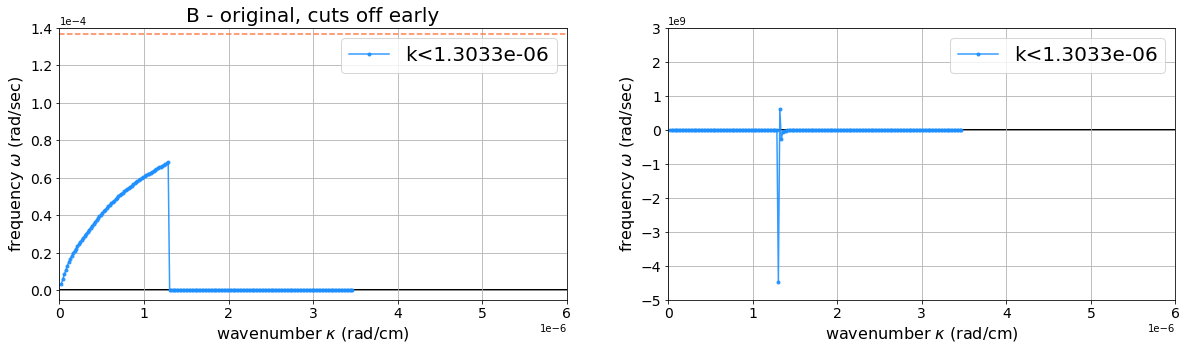

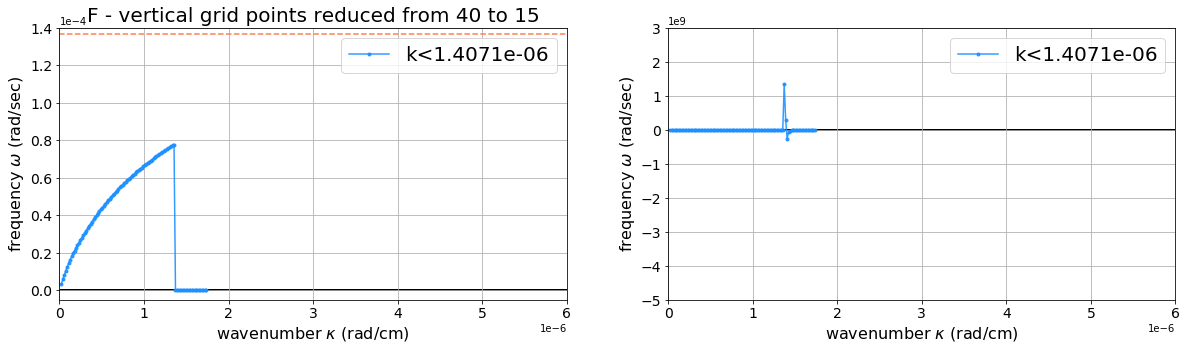

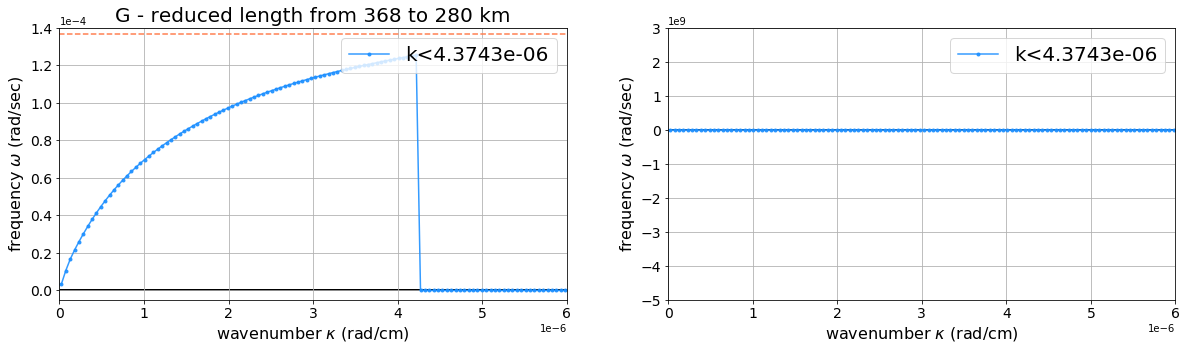

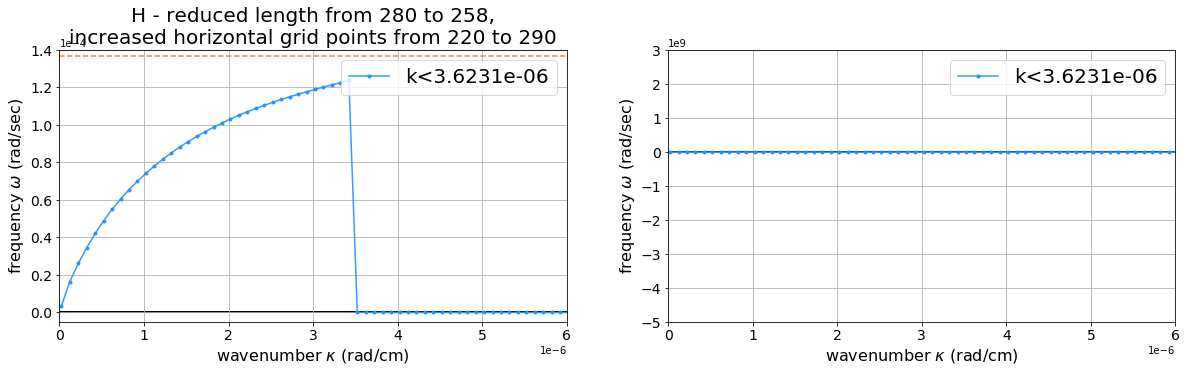

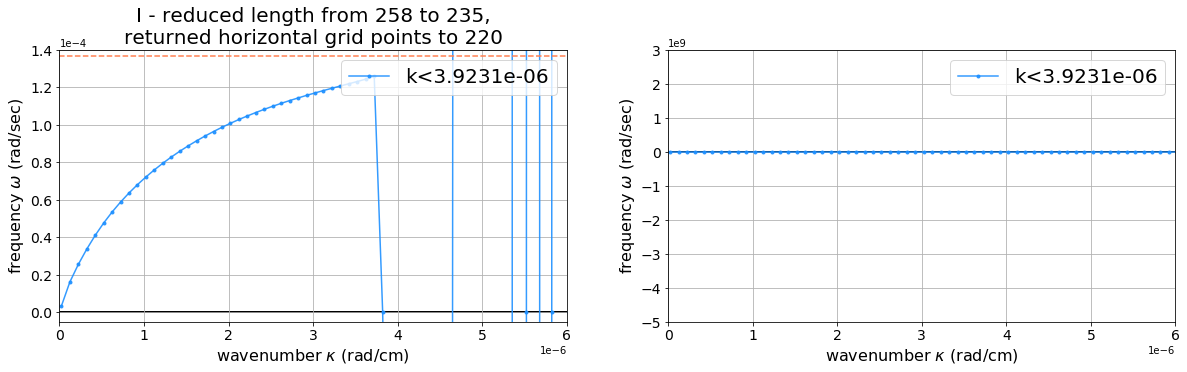

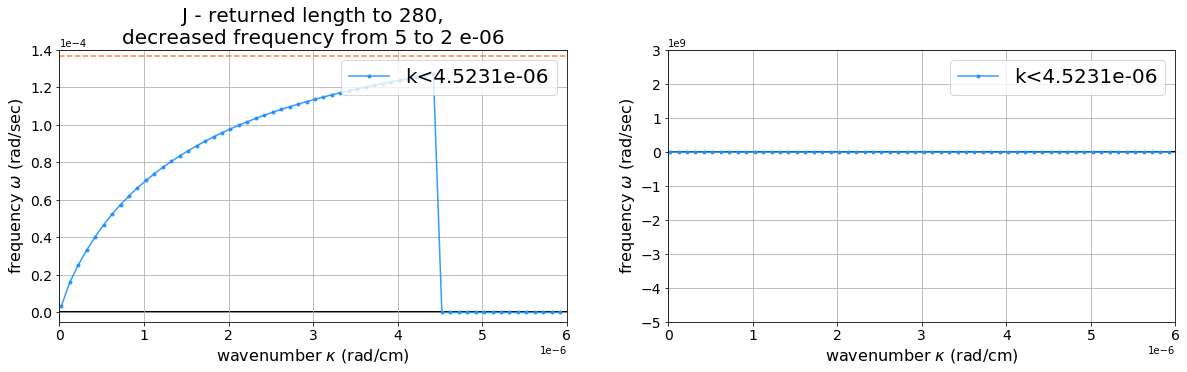

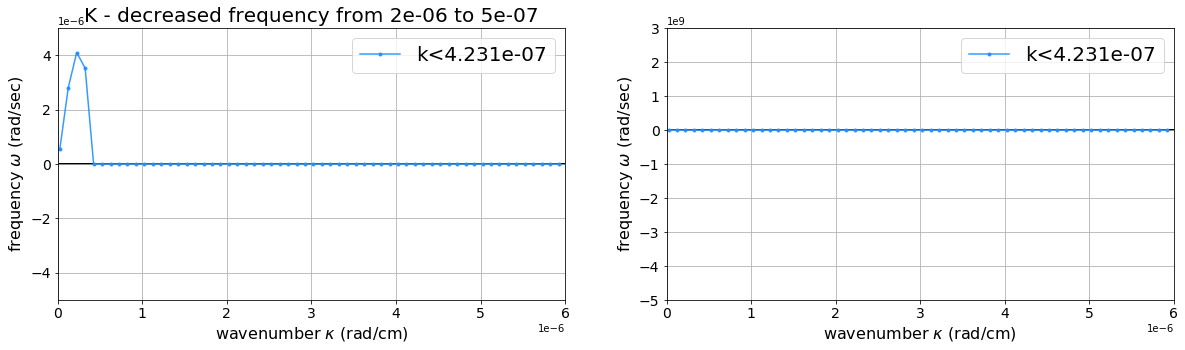

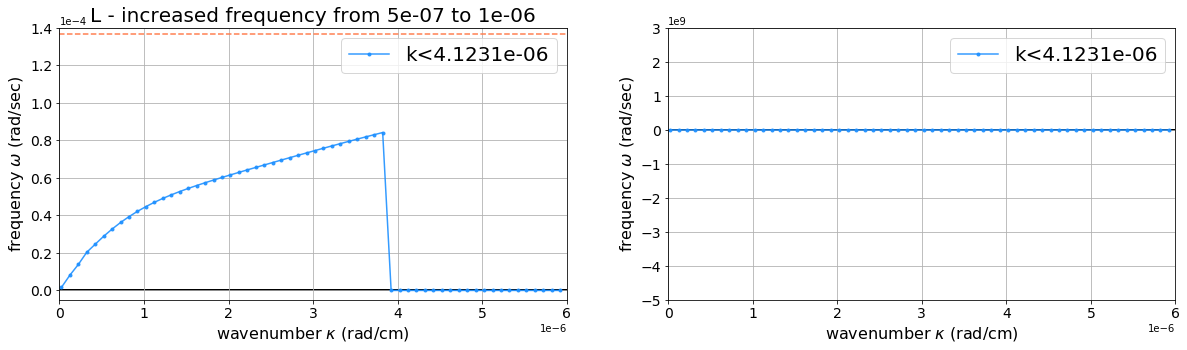

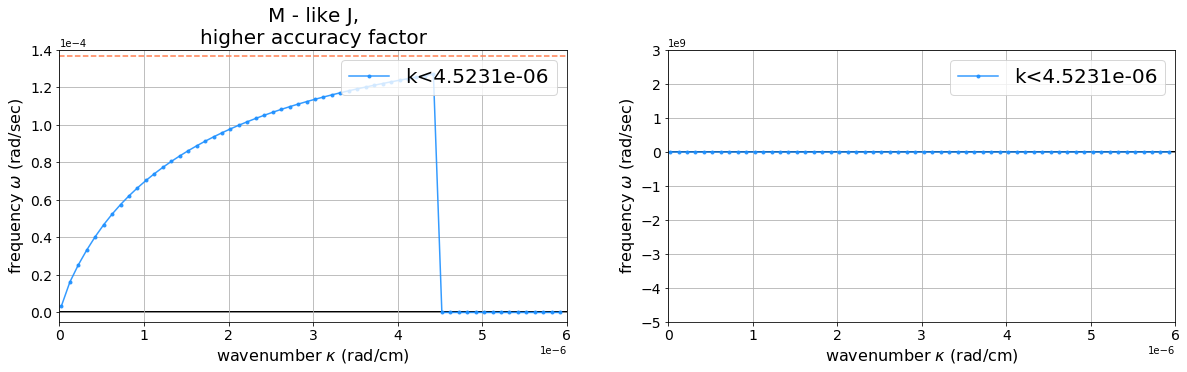

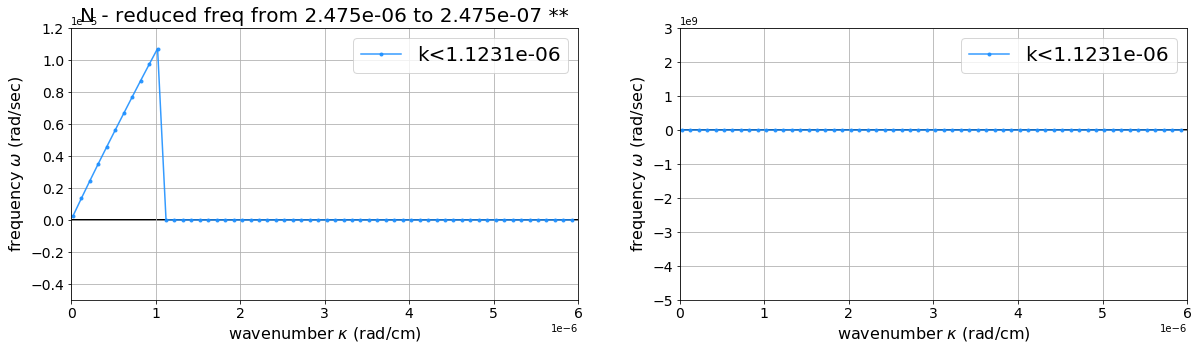

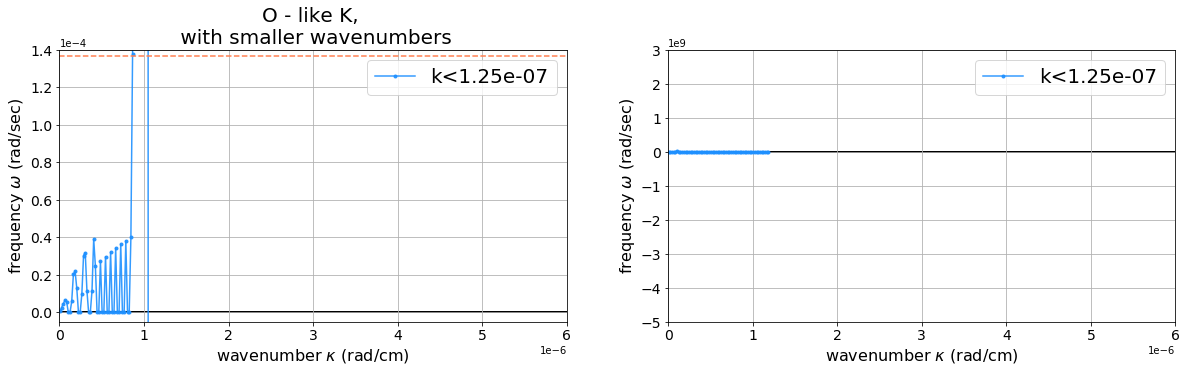

In [97]:
plot_disp('dispc_495e06.dat', 'B',' - original, cuts off early')
plot_disp('dispc_F.dat', 'F',' - vertical grid points reduced from 40 to 15')
plot_disp('dispc_G.dat', 'G',' - reduced length from 368 to 280 km')
plot_disp('dispc_H.dat', 'H',' - reduced length from 280 to 258,\nincreased horizontal grid points from 220 to 290')
plot_disp('dispc_I.dat', 'I',' - reduced length from 258 to 235,\nreturned horizontal grid points to 220')
plot_disp('dispc_J.dat', 'J',' - returned length to 280,\ndecreased frequency from 5 to 2 e-06')
plot_disp('dispc_K.dat', 'K',' - decreased frequency from 2e-06 to 5e-07')
plot_disp('dispc_L.dat', 'L',' - increased frequency from 5e-07 to 1e-06')
plot_disp('dispc_M.dat', 'M',' - like J,\nhigher accuracy factor')
plot_disp('dispc_N.dat', 'N',' - reduced freq from 2.475e-06 to 2.475e-07 **')
plot_disp('dispc_O.dat', 'O',' - like K, \n with smaller wavenumbers')